# Example incremental method

The following structure is investigated

![structure](data_example_2_lecture_3/structure.svg)

In [33]:
#import packages
import sympy as sym
import matplotlib.pyplot as plt
sym.init_printing()

In [34]:
#Defines symbols and functions
EI, q_L, x, L, M_p = sym.symbols('EI, q_L, x, L, M_p')
w = sym.Function('w')

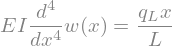

In [35]:
# Define the ODE for the bending of the beam
ODE_bending = sym.Eq(w(x).diff(x, 4) *EI, q_L/L*x)
display(ODE_bending)

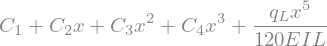

In [36]:
# Solve the ODE
w = sym.dsolve(ODE_bending, w(x)).rhs
display(w)

In [37]:
# Define the continuum fields of phi, kappa, M, and V
phi = -w.diff(x)
kappa = phi.diff(x)
M = EI * kappa
V = M.diff(x)

## Linear behaviour: fixed beam at both ends
![q0<qL<q1](data_example_2_lecture_3/q0-q1.svg)

In [38]:
# Define the boundary conditions
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L),0)
eq3 = sym.Eq(phi.subs(x,0),0)
eq4 = sym.Eq(phi.subs(x,L),0)

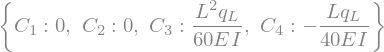

In [39]:
# Solve the integration constants
sol1 = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
display(sol1)

In [40]:
# Define some dummy values to plot the results
plotvalues = {EI:1, q_L:1, L:1, M_p:0.01}

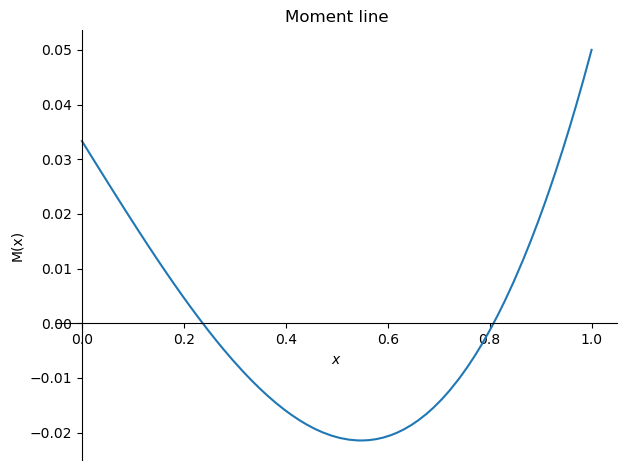

In [41]:
# Plot the moment line to identify the maximum moment
sym.plot(-M.subs(sol1).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Moment line');

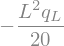

In [42]:
# Obtain the maximum moment at x = L
display(M.subs(sol1).subs(x,L))


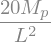

In [43]:
# Obtain the load corresponding to the first yield moment
q1 = sym.solve(sym.Eq(-M.subs(sol1).subs(x,L),M_p), q_L)[0]
display(q1)

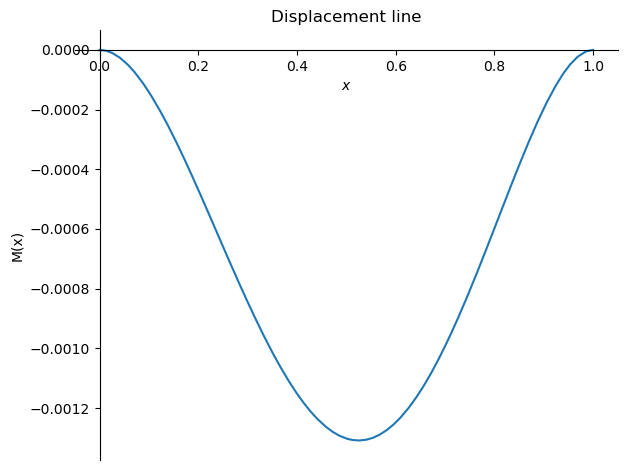

In [44]:
# Plot the displacement line
sym.plot(-w.subs(sol1).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Displacement line');

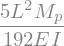

In [45]:
# Obtain the displacement at x = L/2
w1 = w.subs(sol1).subs(q_L, q1).subs(x,L/2)
display(w1)

## Plastic behaviour: Beam simply supported on right with $M_p$ working at it
![q1<qL<q2](data_example_2_lecture_3/q1-q2.svg)

In [46]:
# Define the boundary conditions
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L),0)
eq3 = sym.Eq(phi.subs(x,0),0)
eq4 = sym.Eq(M.subs(x,L),-M_p)

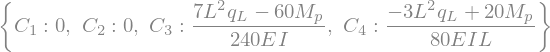

In [47]:
# Solve the integration constants
sol2 = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
display(sol2)

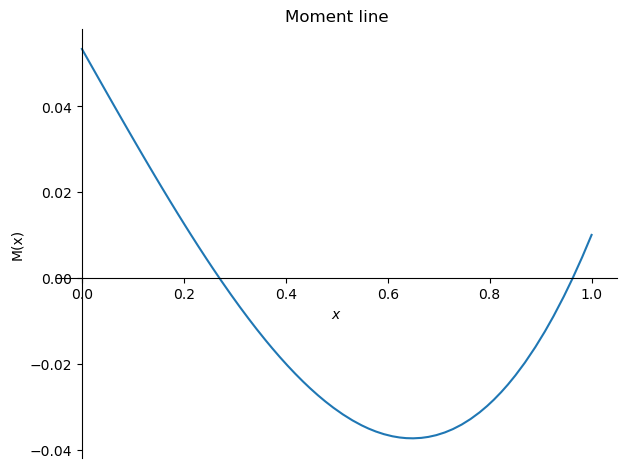

In [48]:
# Plot the moment line to identify the maximum moment
sym.plot(-M.subs(sol2).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Moment line');

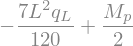

In [49]:
# Obtain the maximum moment at x = 0
display(M.subs(sol2).subs(x,0))

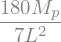

In [50]:
# Obtain the load corresponding to the second yield moment
q2 = sym.solve(sym.Eq(-M.subs(sol2).subs(x,0),M_p), q_L)[0]
display(q2)

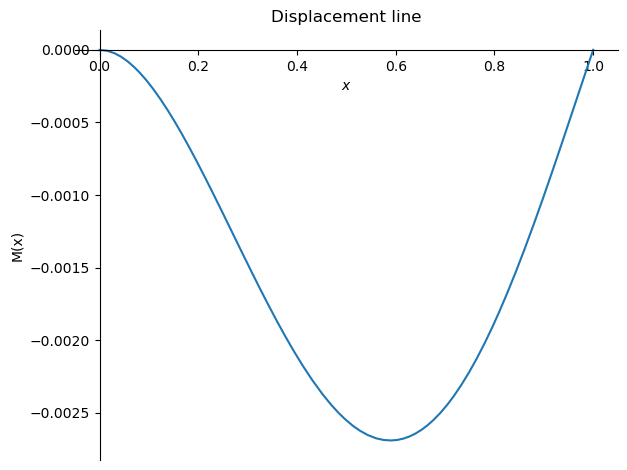

In [51]:
# Plot the displacement line
sym.plot(-w.subs(sol2).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Displacement line');

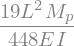

In [55]:
# Obtain the displacement at x = L/2
w2 = w.subs(sol2).subs(q_L, q2).subs(x,L/2)
display(w2)

## Plastic behaviour: Beam simply supported on both ends with $M_p$ working at it
![q2<qL<q3](data_example_2_lecture_3/q2-q3.svg)

In [57]:
# Define the boundary conditions
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L),0)
eq3 = sym.Eq(M.subs(x,0),-M_p)
eq4 = sym.Eq(M.subs(x,L),-M_p)

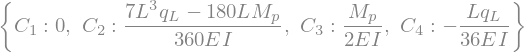

In [58]:
# Solve the integration constants
sol3 = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
display(sol3)

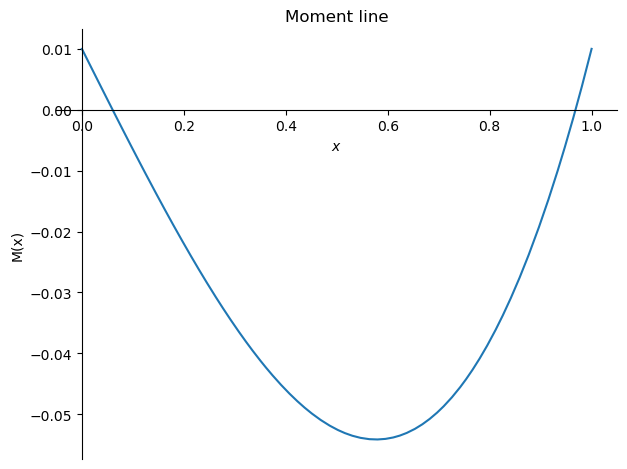

In [59]:
# Plot the moment line to identify the maximum moment
sym.plot(-M.subs(sol3).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Moment line');

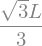

In [70]:
# Find the location of the maximum moment
x_M_max = sym.solve(sym.Eq(V.subs(sol3),0),x)[1]
display(x_M_max)

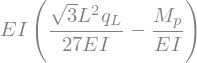

In [61]:
# Obtain the maximum moment at x = x_M_max
display(M.subs(sol3).subs(x,x_M_max))

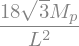

In [63]:
# Obtain the load corresponding to the third yield moment
q3 = sym.solve(sym.Eq(M.subs(sol3).subs(x,x_M_max).subs(x,0),M_p), q_L)[0]
display(q3)

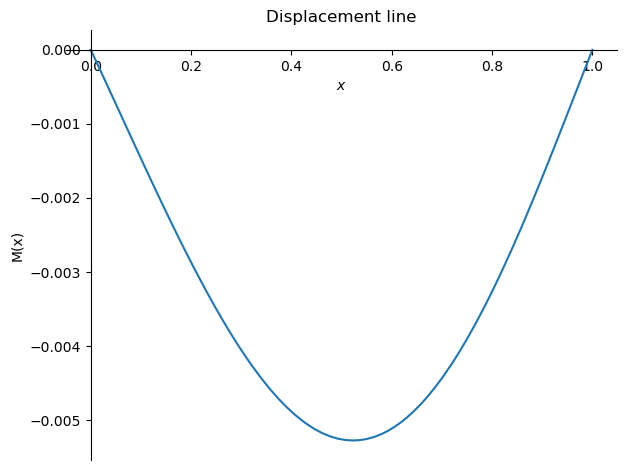

In [64]:
# Plot the displacement line
sym.plot(-w.subs(sol3).subs(plotvalues),(x,0,1),ylabel='M(x)',title='Displacement line');

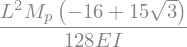

In [66]:
# Obtain the displacement at x = L/2
w3 = w.subs(sol3).subs(q_L, q3).subs(x,L/2).simplify()
display(sym.simplify(w3))

## Mechanism: Beam simply supported on both ends with $M_p$ working at it and a plastic hinge at $\frac{\sqrt{3}L}{3}$
![q3<qL](data_example_2_lecture_3/q3-.svg)

## $q_L-w_C$ diagram

In [67]:
# Obtain the displacements and q values as coefficients of a constant term.
w_list = [0,w1.coeff(L**2*M_p/EI),w2.coeff(L**2*M_p/EI),w3.coeff(L**2*M_p/EI),w3.coeff(L**2*M_p/EI)*2]
q_list = [0,q1.coeff(M_p/L**2),q2.coeff(M_p/L**2),q3.coeff(M_p/L**2),q3.coeff(M_p/L**2)]

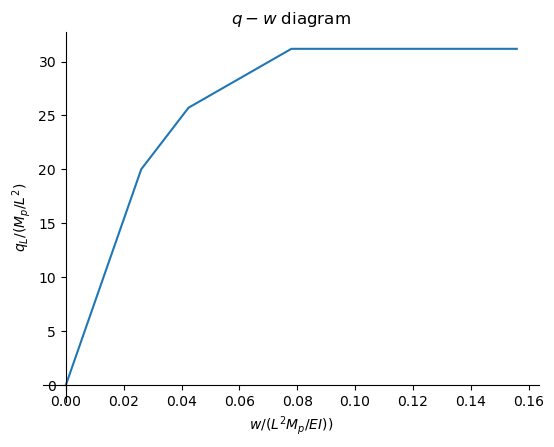

In [69]:
# Plot the q_L-w diagram
plt.plot(w_list,q_list)
plt.xlabel('$w / (L^2 M_p / EI))$')
plt.ylabel('$q_L / (M_p / L^2)$')
plt.title('$q-w$ diagram')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['left'].set_position('zero')